In [80]:
import pandas as pd
checker_res_gemma = pd.read_csv('../checker_results/0905test_eval_output.csv')
checker_res_mistral = pd.read_csv('../checker_results/0907_mistral_search_agent_test_eval_output.csv')
checker_res_llama = pd.read_csv('../checker_results/0907_llama_react_test_eval_output.csv')
inference_res = pd.read_csv('../checker/test_results.csv')
inference_res1 = pd.read_csv('../checker/09072test_results.csv')

checker_res_gemma = checker_res_gemma[checker_res_gemma['model_name'] =='gemma']
inference_res = inference_res[~((inference_res['Model Name'] =='mistral') & (inference_res['Model Type'] =='search_agent'))]

In [108]:
inference_res = pd.concat([inference_res, inference_res1[inference_res1['Model Name'] == 'mistral' ]], axis=0).to_csv('../checker/test_results.csv', index=False)

In [82]:
inference_res

,Model Type,Model Name,test_id,query,result,reference,strategy
182,search_agent,llama,0,I'm planning a year-long backpacking trip arou...,"Based on the provided information, here are so...","[[{'content': ""The expert's ultimate backpacki...",Planning
183,search_agent,llama,1,As a 26-year-old working for a non-profit and ...,As a 26-year-old non-profit professional earni...,"[""Stack Overflow's 2024 Developer Survey just ...",Direct
184,search_agent,llama,2,I'm an aspiring travel influencer/vlogger. Wha...,"As an aspiring travel influencer/vlogger, stan...",['Premium accounts offer even more useful and ...,Direct
185,search_agent,llama,3,I'm skeptical about the benefits of travel. Ca...,"In conclusion, while there are potential draw...","[[{'content': 'So without any further ado, her...",Planning
186,search_agent,llama,4,"As an LGBTQ+ traveler, I'm concerned about saf...","As an LGBTQ+ traveler, it is essential to prio...",['PYTHON Full Course for Beginners in 16 Hours...,Direct
...,...,...,...,...,...,...,...
177,search_agent,mistral,177,Among the companies with competitiveness in th...,"\r\nBased on the provided context, both Baidu ...","[""Baidu, the leading search engine in China, i...",Parallel
178,search_agent,mistral,178,Compare which e-commerce strategy is better be...,\r\nAlibaba and Amazon are two of the largest ...,###Reference Answers###\r\n\r\nBased on the se...,Planning
179,search_agent,mistral,179,Investigate the technological innovation and u...,\r\nHuawei and Xiaomi are two major Chinese sm...,###Reference Answers###\r\n\r\nBased on the se...,Planning
180,search_agent,mistral,180,Help me plan the development direction of an e...,\r\nTo plan the development direction of an ea...,###Reference Answers###\r\n\r\nTo plan the dev...,Planning


In [83]:
import pandas as pd

def replace_model_type(value):
    if '1' in value:
        return 'SRSA'
    elif '2' in value:
        return 'ReAct'
    elif '3' in value:
        return 'Simple'
    else:
        return value  


checker_res_mistral['model_type'] = checker_res_mistral['model_type'].apply(replace_model_type)
checker_res_llama['model_type'] = checker_res_llama['model_type'].apply(replace_model_type)
checker_res_gemma['model_type'] = checker_res_gemma['model_type'].apply(replace_model_type)

In [84]:
def replace_value(value):
    value = str(value)

    if '1' in value:
        return 1
    elif '2' in value:
        return 2
    elif '3' in value:
        return 3
    elif '4' in value:
        return 4
    elif '5' in value:
        return 5
    else:
        return 0



checker_res_llama = checker_res_llama.fillna(0)

checker_res_llama['informativeness'] = checker_res_llama['informativeness'].apply(replace_value)
checker_res_llama['completeness'] = checker_res_llama['completeness'].apply(replace_value)
checker_res_llama['novelty'] = checker_res_llama['novelty'].apply(replace_value)
checker_res_llama['actionability'] = checker_res_llama['actionability'].apply(replace_value)


checker_res_mistral = checker_res_mistral.fillna(0)
checker_res_mistral['informativeness'] = checker_res_mistral['informativeness'].apply(replace_value)
checker_res_mistral['completeness'] = checker_res_mistral['completeness'].apply(replace_value)
checker_res_mistral['novelty'] = checker_res_mistral['novelty'].apply(replace_value)
checker_res_mistral['actionability'] = checker_res_mistral['actionability'].apply(replace_value)

checker_res_gemma = checker_res_gemma.fillna(0)
checker_res_gemma['informativeness'] = checker_res_gemma['informativeness'].apply(replace_value)
checker_res_gemma['completeness'] = checker_res_gemma['completeness'].apply(replace_value)
checker_res_gemma['novelty'] = checker_res_gemma['novelty'].apply(replace_value)
checker_res_gemma['actionability'] = checker_res_gemma['actionability'].apply(replace_value)

In [85]:
checker_res = pd.concat([checker_res_gemma, checker_res_mistral, checker_res_llama], axis=0)
checker_res

,query,model_type,informativeness,completeness,novelty,actionability,model_name,eval_count
2178,I'm planning a year-long backpacking trip arou...,SRSA,0,0,0,0,gemma,0.0
2179,I'm planning a year-long backpacking trip arou...,ReAct,5,5,4,5,gemma,0.0
2180,I'm planning a year-long backpacking trip arou...,Simple,5,5,3,4,gemma,0.0
2181,I'm planning a year-long backpacking trip arou...,SRSA,0,0,0,0,gemma,1.0
2182,I'm planning a year-long backpacking trip arou...,ReAct,4,4,2,4,gemma,1.0
...,...,...,...,...,...,...,...,...
1087,Please tell me why Apple and Google have been ...,ReAct,5,5,4,4,llama,0.0
1088,Please tell me why Apple and Google have been ...,Simple,4,3,3,3,llama,0.0
1089,Please tell me why Apple and Google have been ...,SRSA,5,5,3,3,llama,1.0
1090,Please tell me why Apple and Google have been ...,ReAct,5,5,4,2,llama,1.0


In [86]:
def replace_model_type(x):
    if x == 'search_agent':
        return 'SRSA'
    elif 'react' in x:
        return 'ReAct'
    elif 'simple' in x:
        return 'Simple'
    
inference_res['Model Type'] = inference_res['Model Type'].apply(replace_model_type)

In [87]:
# merge two dataframes if they have same query, model_name and model type
merged = pd.merge(checker_res, inference_res, left_on=['query', 'model_name', 'model_type'], 
                  right_on=['query', 'Model Name', 'Model Type'], how='inner')
merged.head()
# drop 掉informative, completeness, novelty, actionability中一列为<1的行
merged = merged[(merged['informativeness'] >= 1) & (merged['completeness'] >= 1) & (merged['novelty'] >= 1) & (merged['actionability'] >= 1)]
merged.head()

,query,model_type,informativeness,completeness,novelty,actionability,model_name,eval_count,Model Type,Model Name,test_id,result,reference,strategy
1,I'm planning a year-long backpacking trip arou...,ReAct,5,5,4,5,gemma,0.0,ReAct,gemma,0,\n\n**Answer:**\n\nBackpacking on a budget is ...,"[[{'content': ""2. Score free transport! Number...",NaN
2,I'm planning a year-long backpacking trip arou...,Simple,5,5,3,4,gemma,0.0,Simple,gemma,0,To make your $5000 budget stretch for a year-l...,['These tips for backpacking are all about fin...,NaN
4,I'm planning a year-long backpacking trip arou...,ReAct,4,4,2,4,gemma,1.0,ReAct,gemma,0,\n\n**Answer:**\n\nBackpacking on a budget is ...,"[[{'content': ""2. Score free transport! Number...",NaN
5,I'm planning a year-long backpacking trip arou...,Simple,4,5,3,5,gemma,1.0,Simple,gemma,0,To make your $5000 budget stretch for a year-l...,['These tips for backpacking are all about fin...,NaN
6,As a 26-year-old working for a non-profit and ...,SRSA,4,3,3,4,gemma,0.0,SRSA,gemma,1,It's great you're planning some big trips! To...,"[""The 6 Best Laptops For Battery Life - Black ...",Direct


In [88]:
merged[merged['model_type']=='SRSA'].groupby(['strategy','model_name']).count()

query  model_type  informativeness  completeness  \
strategy model_name                                                     
Direct   gemma         263         263              263           263   
         llama         273         273              273           273   
         mistral        10          10               10            10   
Parallel mistral        24          24               24            24   
Planning gemma          39          39               39            39   
         llama          69          69               69            69   
         mistral       317         317              317           317   

                     novelty  actionability  eval_count  Model Type  \
strategy model_name                                                   
Direct   gemma           263            263         263         263   
         llama           273            273         273         273   
         mistral          10             10          10          10   
Parallel mistral          24             24          24          24   
Planning gemma            39             39          39          39   
         llama            69             69          69          69   
         mistral         317            317         317         317   

                     Model Name  test_id  result  reference  
strategy model_name                                          
Direct   gemma              263      263     263        263  
         llama              273      273     273        273  
         mistral             10       10      10         10  
Parallel mistral             24       24      24         24  
Planning gemma               39       39      39         39  
         llama               69       69      69         69  
         mistral            317      317     317        317

In [89]:
merged[merged['model_type']=='SRSA'].groupby(['strategy','model_name'])[['informativeness', 'completeness','novelty','actionability']].mean()

informativeness  completeness   novelty  actionability
strategy model_name                                                        
Direct   gemma              4.448669      4.509506  3.171103       3.692015
         llama              4.575092      4.739927  3.333333       3.802198
         mistral            4.200000      4.500000  3.200000       3.500000
Parallel mistral            4.458333      4.750000  3.083333       3.500000
Planning gemma              3.641026      3.692308  2.538462       3.179487
         llama              3.289855      3.130435  2.333333       2.826087
         mistral            4.539432      4.665615  3.343849       3.782334

In [90]:
mistral_strategy = merged[merged['model_name']=='mistral'][merged['model_type']=='SRSA'].groupby(['strategy','model_name'])[['informativeness', 'completeness','novelty','actionability']].agg(['mean', 'count']).reset_index()
# 转化成dataframe
mistral_strategy


/var/folders/q3/w058rs213y1fbnz4r36x5z2m0000gn/T/ipykernel_51538/1724820342.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mistral_strategy = merged[merged['model_name']=='mistral'][merged['model_type']=='SRSA'].groupby(['strategy','model_name'])[['informativeness', 'completeness','novelty','actionability']].agg(['mean', 'count']).reset_index()


strategy model_name informativeness       completeness         novelty  \
                                  mean count         mean count      mean   
0    Direct    mistral        4.200000    10     4.500000    10  3.200000   
1  Parallel    mistral        4.458333    24     4.750000    24  3.083333   
2  Planning    mistral        4.539432   317     4.665615   317  3.343849   

        actionability        
  count          mean count  
0    10      3.500000    10  
1    24      3.500000    24  
2   317      3.782334   317

In [91]:

merged.groupby(['model_type','model_name'])[['informativeness', 'completeness','novelty','actionability']].mean()

informativeness  completeness   novelty  actionability
model_type model_name                                                        
ReAct      gemma              3.527950      3.232919  2.562112       2.798137
           llama              3.510638      3.142857  2.504559       2.875380
           mistral            3.448541      3.084485  2.609831       2.755760
SRSA       gemma              4.344371      4.403974  3.089404       3.625828
           llama              4.315789      4.415205  3.131579       3.605263
           mistral            4.524217      4.666667  3.321937       3.754986
Simple     gemma              4.088571      3.937143  3.042857       3.554286
           llama              4.340909      4.301136  3.377841       3.923295
           mistral            4.256410      4.159544  3.356125       3.746439

In [92]:
merged.head()

,query,model_type,informativeness,completeness,novelty,actionability,model_name,eval_count,Model Type,Model Name,test_id,result,reference,strategy
1,I'm planning a year-long backpacking trip arou...,ReAct,5,5,4,5,gemma,0.0,ReAct,gemma,0,\n\n**Answer:**\n\nBackpacking on a budget is ...,"[[{'content': ""2. Score free transport! Number...",NaN
2,I'm planning a year-long backpacking trip arou...,Simple,5,5,3,4,gemma,0.0,Simple,gemma,0,To make your $5000 budget stretch for a year-l...,['These tips for backpacking are all about fin...,NaN
4,I'm planning a year-long backpacking trip arou...,ReAct,4,4,2,4,gemma,1.0,ReAct,gemma,0,\n\n**Answer:**\n\nBackpacking on a budget is ...,"[[{'content': ""2. Score free transport! Number...",NaN
5,I'm planning a year-long backpacking trip arou...,Simple,4,5,3,5,gemma,1.0,Simple,gemma,0,To make your $5000 budget stretch for a year-l...,['These tips for backpacking are all about fin...,NaN
6,As a 26-year-old working for a non-profit and ...,SRSA,4,3,3,4,gemma,0.0,SRSA,gemma,1,It's great you're planning some big trips! To...,"[""The 6 Best Laptops For Battery Life - Black ...",Direct


/var/folders/q3/w058rs213y1fbnz4r36x5z2m0000gn/T/ipykernel_51538/3504228398.py:12: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_model['max_' + metric] = df_model.groupby(['test_id', 'eval_count'])[metric].transform(max)
/var/folders/q3/w058rs213y1fbnz4r36x5z2m0000gn/T/ipykernel_51538/3504228398.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['max_' + metric] = df_model.groupby(['test_id', 'eval_count'])[metric].transform(max)
/var/folders/q3/w058rs213y1fbnz4r36x5z2m0000gn/T/ipykernel_51538/3504228398.py:13: SettingWithCopyWarning: 
A value is tr

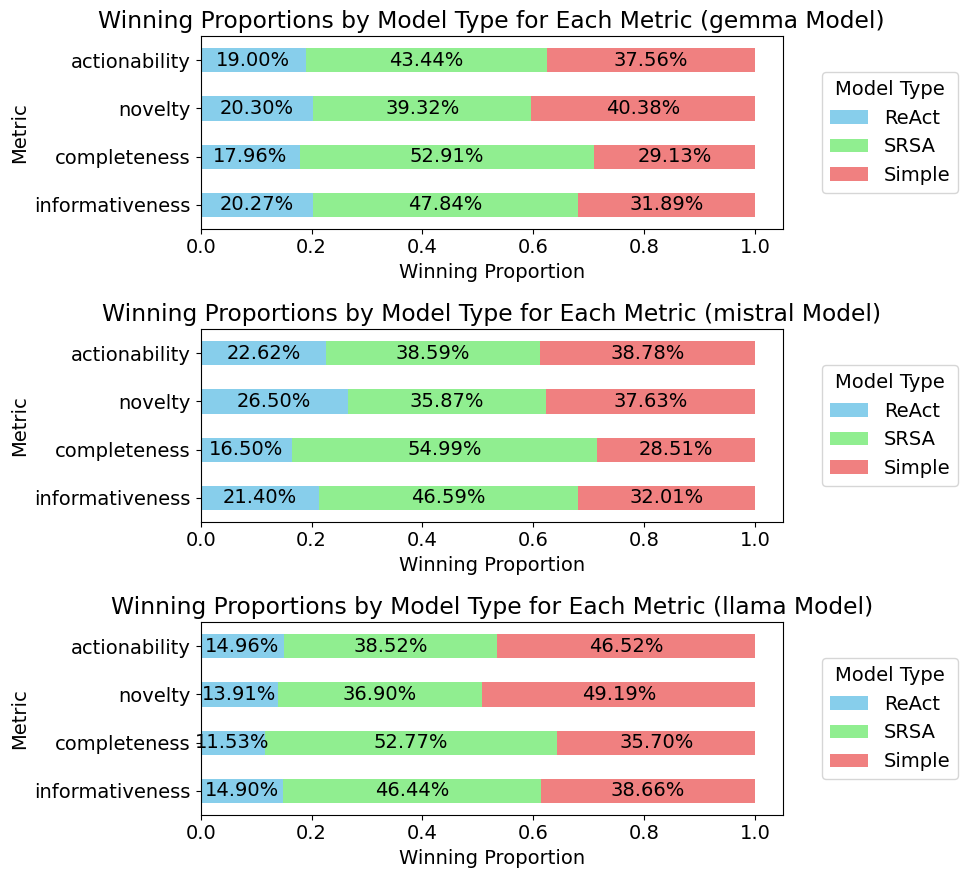

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

win_proportions_combined = {}
metrics = ['informativeness', 'completeness', 'novelty', 'actionability']

for model_name in merged['model_name'].unique():
    df_model = merged[merged['model_name'] == model_name]
    win_df_model = {}
    for metric in metrics:
        df_model['max_' + metric] = df_model.groupby(['test_id', 'eval_count'])[metric].transform(max)
        df_model[metric + '_winner'] = df_model[metric] == df_model['max_' + metric]
        proportions = df_model[df_model[metric + '_winner']].groupby('model_type').size() / df_model['test_id'].nunique()
        win_df_model[metric] = proportions
    win_proportions_combined[model_name] = pd.DataFrame(win_df_model).fillna(0)

fig, axes = plt.subplots(len(win_proportions_combined), 1, figsize=(10, 3 * len(win_proportions_combined)))

if len(win_proportions_combined) == 1:
    axes = [axes]

for i, (model_name, win_df) in enumerate(win_proportions_combined.items()):
    win_df = win_df.T 

    normalized_data = win_df.div(win_df.sum(axis=1), axis=0) 

    ax = normalized_data.plot(kind='barh', stacked=True, color=['skyblue', 'lightgreen', 'lightcoral'], ax=axes[i])
    axes[i].set_title(f'Winning Proportions by Model Type for Each Metric ({model_name} Model)')
    axes[i].set_xlabel('Winning Proportion')
    axes[i].set_ylabel('Metric')


    for container in ax.containers:
        labels = [f'{v * 100:.2f}%' if v > 0 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='center')


    ax.legend(title='Model Type', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()


----

In [94]:
merged.head()

,query,model_type,informativeness,completeness,novelty,actionability,model_name,eval_count,Model Type,Model Name,test_id,result,reference,strategy
1,I'm planning a year-long backpacking trip arou...,ReAct,5,5,4,5,gemma,0.0,ReAct,gemma,0,\n\n**Answer:**\n\nBackpacking on a budget is ...,"[[{'content': ""2. Score free transport! Number...",NaN
2,I'm planning a year-long backpacking trip arou...,Simple,5,5,3,4,gemma,0.0,Simple,gemma,0,To make your $5000 budget stretch for a year-l...,['These tips for backpacking are all about fin...,NaN
4,I'm planning a year-long backpacking trip arou...,ReAct,4,4,2,4,gemma,1.0,ReAct,gemma,0,\n\n**Answer:**\n\nBackpacking on a budget is ...,"[[{'content': ""2. Score free transport! Number...",NaN
5,I'm planning a year-long backpacking trip arou...,Simple,4,5,3,5,gemma,1.0,Simple,gemma,0,To make your $5000 budget stretch for a year-l...,['These tips for backpacking are all about fin...,NaN
6,As a 26-year-old working for a non-profit and ...,SRSA,4,3,3,4,gemma,0.0,SRSA,gemma,1,It's great you're planning some big trips! To...,"[""The 6 Best Laptops For Battery Life - Black ...",Direct


In [95]:
data = merged.groupby(['model_type','model_name','test_id'])[['informativeness', 'completeness','novelty','actionability']].mean().reset_index()
data

,model_type,model_name,test_id,informativeness,completeness,novelty,actionability
0,ReAct,gemma,0,4.5,4.5,3.0,4.5
1,ReAct,gemma,1,2.5,2.0,1.5,2.5
2,ReAct,gemma,2,3.5,4.0,3.0,3.5
3,ReAct,gemma,3,4.0,4.0,2.5,3.5
4,ReAct,gemma,4,4.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...
1540,Simple,mistral,177,4.0,4.5,3.5,3.5
1541,Simple,mistral,178,4.0,4.0,3.0,2.0
1542,Simple,mistral,179,5.0,5.0,4.5,4.0
1543,Simple,mistral,180,3.0,3.5,2.0,3.0


In [96]:
data_s = data.merge(merged[['model_type','model_name','test_id','strategy']], on=['model_type','model_name','test_id'])
data_s.drop_duplicates(inplace=True)
data_s

,model_type,model_name,test_id,informativeness,completeness,novelty,actionability,strategy
0,ReAct,gemma,0,4.5,4.5,3.0,4.5,NaN
2,ReAct,gemma,1,2.5,2.0,1.5,2.5,NaN
4,ReAct,gemma,2,3.5,4.0,3.0,3.5,NaN
6,ReAct,gemma,3,4.0,4.0,2.5,3.5,NaN
8,ReAct,gemma,4,4.0,3.0,2.5,2.5,NaN
...,...,...,...,...,...,...,...,...
3341,Simple,mistral,177,4.0,4.5,3.5,3.5,NaN
3343,Simple,mistral,178,4.0,4.0,3.0,2.0,NaN
3344,Simple,mistral,179,5.0,5.0,4.5,4.0,NaN
3346,Simple,mistral,180,3.0,3.5,2.0,3.0,NaN


In [97]:

llama_sa_d_index = data_s[(data_s['model_name']=='llama') & (data_s['model_type']=='SRSA') & (data_s['strategy']=='Direct')]['test_id'].values
gemma_sa_d_index = data_s[(data_s['model_name']=='gemma') & (data_s['model_type']=='SRSA') & (data_s['strategy']=='Direct')]['test_id'].values

llama_sa_d = data_s[(data_s['model_name']=='llama') & (data_s['model_type']=='SRSA') & (data_s['strategy']=='Direct')].groupby(['model_name','model_type','strategy'])[['informativeness', 'completeness','novelty','actionability']].agg(['mean', 'std']).reset_index()
llama_sa_d_simple_search = data_s[(data_s['model_name']=='llama') & (data_s['model_type']=='Simple') & (data_s['test_id'].isin(llama_sa_d_index))][['informativeness', 'completeness','novelty','actionability']].agg(['mean', 'std']).reset_index()
gemma_sa_d = data_s[(data_s['model_name']=='gemma') & (data_s['model_type']=='SRSA') & (data_s['strategy']=='Direct')].groupby(['model_name','model_type','strategy'])[['informativeness', 'completeness','novelty','actionability']].agg(['mean', 'std']).reset_index()
gemma_sa_d_simple_search = data_s[(data_s['model_name']=='gemma') & (data_s['model_type']=='Simple') & (data_s['test_id'].isin(gemma_sa_d_index))][['informativeness', 'completeness','novelty','actionability']].agg(['mean', 'std']).reset_index()


print("llama_sa_d (Direct strategy):")
print(llama_sa_d)
print("\nllama_sa_d_simple_search:")
print(llama_sa_d_simple_search)
print("\ngemma_sa_d (Direct strategy):")
print(gemma_sa_d)
print("\ngemma_sa_d_simple_search:")
print(gemma_sa_d_simple_search)

llama_sa_d (Direct strategy):
  model_name model_type strategy informativeness           completeness  \
                                            mean       std         mean   
0      llama       SRSA   Direct        4.572464  0.562031      4.73913   

              novelty           actionability            
        std      mean       std          mean       std  
0  0.567416  3.333333  0.558064      3.793478  0.832129  

llama_sa_d_simple_search:
  index  informativeness  completeness   novelty  actionability
0  mean         4.286232      4.210145  3.362319       3.822464
1   std         0.550009      0.666759  0.597342       0.693559

gemma_sa_d (Direct strategy):
  model_name model_type strategy informativeness           completeness  \
                                            mean       std         mean   
0      gemma       SRSA   Direct        4.443609  0.777657     4.503759   

              novelty           actionability            
        std      mean       std     

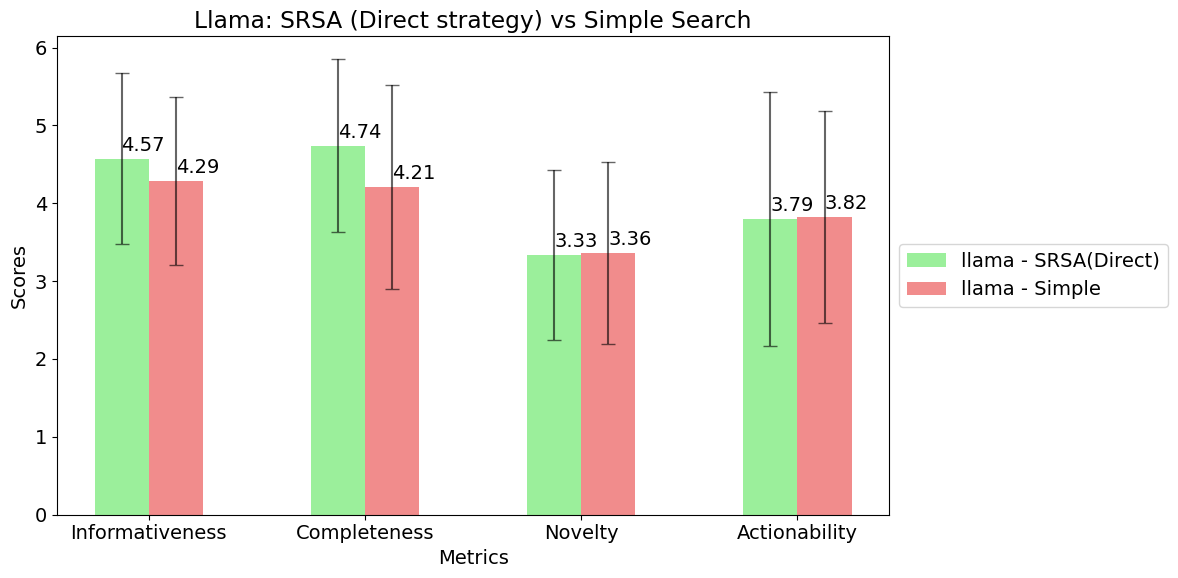

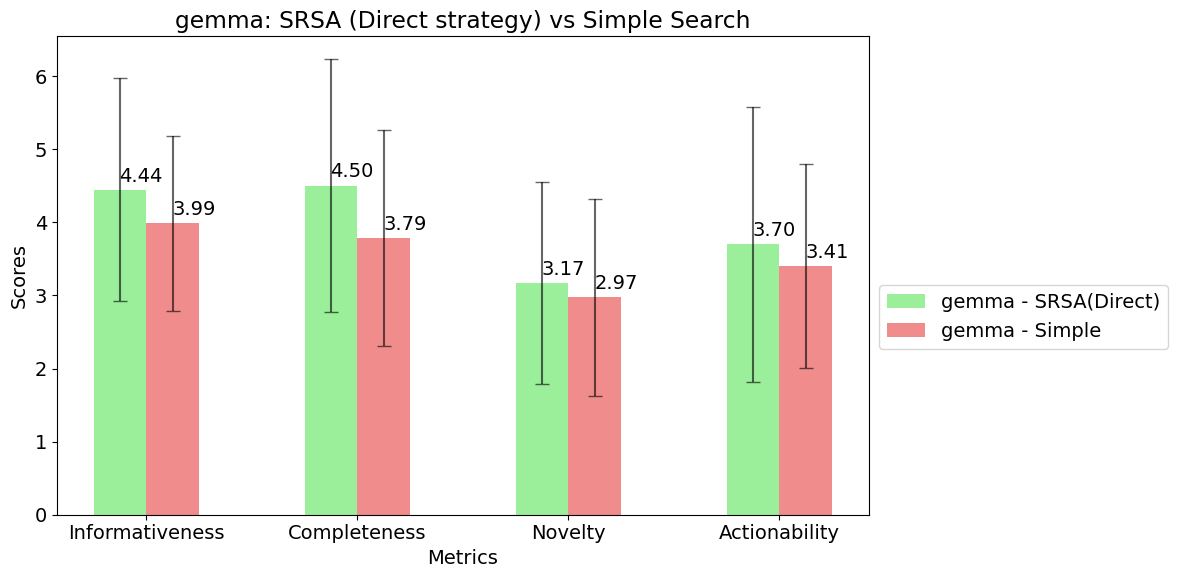

In [98]:
import matplotlib.pyplot as plt
import numpy as np

color1 = 'lightgreen'
color2 = 'lightcoral'
confidence_interval_95 = 1.96

# Data for llama
llama_direct_means = [4.572464, 4.73913, 3.333333, 3.793478]
llama_direct_stds = [0.562031, 0.567416, 0.558064, 0.832129]
llama_simple_search_means = [4.286232, 4.210145, 3.362319, 3.822464]
llama_simple_search_stds = [0.550009, 0.666759, 0.597342, 0.693559]

# Data for gemma
gemma_direct_means = [4.443609, 4.503759, 3.169173, 3.699248]
gemma_direct_stds = [0.777657, 0.882267, 0.706805, 0.961257]
gemma_simple_search_means = [3.988722, 3.785714, 2.973684, 3.406015]
gemma_simple_search_stds = [0.610719, 0.754496,0.6889710, 0.710181]  # No std provided for gemma simple_search

# Labels
categories = ['Informativeness', 'Completeness', 'Novelty', 'Actionability']
x = np.arange(len(categories))  # Label locations
width = 0.25  # Width of the bars

# Plot for llama
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plots with error bars
rects1 = ax.bar(x - width/2, llama_direct_means, width, label='llama - SRSA(Direct)', yerr=np.array(llama_direct_stds) * confidence_interval_95, 
                 color=color1, capsize=5, alpha=0.9, error_kw=dict(alpha=0.6))
rects2 = ax.bar(x + width/2, llama_simple_search_means, width, label='llama - Simple', yerr=np.array(llama_simple_search_stds) * confidence_interval_95
                , color=color2, capsize=5, alpha=0.9, error_kw=dict(alpha=0.6))

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Llama: SRSA (Direct strategy) vs Simple Search')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add value labels above bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2 + 0.1, height),
                    xytext=(0, 3),  # Offset by 3 points in y-direction
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
plt.rcParams.update({'font.size': 14})
# Display llama plot
plt.tight_layout()
plt.show()


# Plot for gemma
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plots with error bars
rects1 = ax.bar(x - width/2, gemma_direct_means, width, label='gemma - SRSA(Direct)', yerr=np.array(gemma_direct_stds) * confidence_interval_95,  color=color1, capsize=5, alpha=0.9, error_kw=dict(alpha=0.6))
rects2 = ax.bar(x + width/2, gemma_simple_search_means, width, label='gemma - Simple', yerr=np.array(gemma_simple_search_stds) * confidence_interval_95,  color=color2, capsize=5, alpha=0.9, error_kw=dict(alpha=0.6))
# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('gemma: SRSA (Direct strategy) vs Simple Search')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend( bbox_to_anchor=(1, 0.5))

# Add value labels above bars
add_labels(rects1)
add_labels(rects2)
plt.rcParams.update({'font.size': 14})
# Display gemma plot
plt.tight_layout()
plt.show()


----

In [99]:
data_mistral = data_s[(data_s['model_name']=='mistral')]
data_mistral_ms = data_mistral.groupby('model_type')[['informativeness', 'completeness','novelty','actionability']].agg(['mean', 'std']).reset_index()
data_mistral_ms


model_type informativeness           completeness             novelty  \
                        mean       std         mean       std      mean   
0      ReAct        3.451036  0.830366     3.089454  0.982647  2.614878   
1       SRSA        4.527307  0.473117     4.661017  0.552170  3.326742   
2     Simple        4.260829  0.550411     4.161959  0.671956  3.359699   

            actionability            
        std          mean       std  
0  0.759193      2.747646  0.957445  
1  0.527454      3.754237  0.746428  
2  0.608698      3.748588  0.750235

In [100]:
data_mistral[data_mistral['strategy'] == 'Planning'][['informativeness', 'completeness','novelty','actionability']].agg(['mean', 'std']).reset_index()

,index,informativeness,completeness,novelty,actionability
0,mean,4.542708,4.659375,3.348958,3.781250
1,std,0.477388,0.570148,0.519298,0.760022


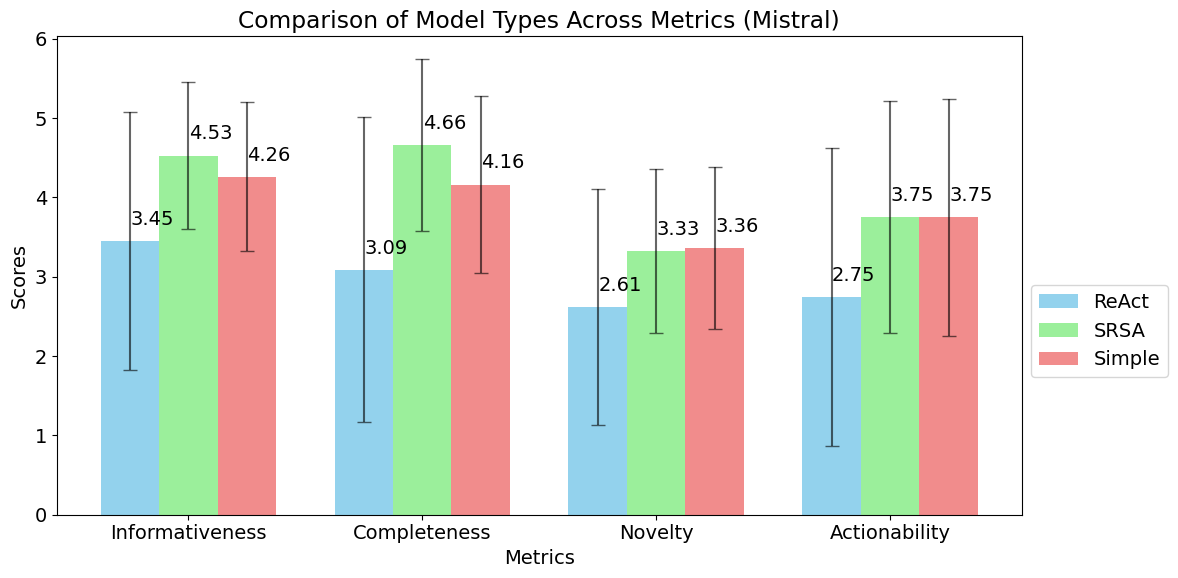

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
metrics = ['Informativeness', 'Completeness', 'Novelty', 'Actionability']
model_types = ['ReAct', 'SRSA', 'Simple']

# Means and STDs arranged by metric across model types
means = {
    'Informativeness': [3.451036, 4.527307, 4.260829],
    'Completeness': [3.089454, 4.661017, 4.161959],
    'Novelty': [2.614878, 3.326742, 3.359699],
    'Actionability': [2.747646, 3.754237, 3.748588]

}

stds = {
    'Informativeness': [0.830366, 0.473117,0.477388, 0.550411],
    'Completeness': [0.982647, 0.552170,0.570148, 0.671956],
    'Novelty': [0.759193, 0.527454, 0.519298, 0.608698],
    'Actionability': [0.957445, 0.746428, 0.760022, 0.750235]
}

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))

# Colors for clarity
colors = ['skyblue', 'lightgreen', 'lightcoral', 'darkorange']

# Plotting each model type's metrics and storing the result for labeling
rects_list = []
for i, model_type in enumerate(model_types):
    means_list = [means[metric][i] for metric in metrics]
    stds_list = [stds[metric][i] for metric in metrics]
    
    rects = ax.bar(x + i * width, means_list, width, label=model_type, yerr=np.array(stds_list) * confidence_interval_95, 
                   capsize=5, color=colors[i], alpha=0.9, error_kw=dict(alpha=0.6))
    rects_list.append(rects)

# Adding labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Types Across Metrics (Mistral)')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend( bbox_to_anchor=(1, 0.5))

# Function to add labels to bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2 + 0.095, height+0.1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to all bars
for rects in rects_list:
    add_labels(rects)
plt.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.show()


-----

In [102]:

data_mistral_ms_s = data_mistral.groupby(['model_type','strategy'])[['informativeness', 'completeness','novelty','actionability']].agg(['mean', 'std']).reset_index()
data_mistral_ms_s


model_type  strategy informativeness           completeness            \
                                  mean       std         mean       std   
0       SRSA    Direct        4.200000  0.273861     4.500000  0.353553   
1       SRSA  Parallel        4.458333  0.450168     4.750000  0.337100   
2       SRSA  Planning        4.542708  0.477388     4.659375  0.570148   

    novelty           actionability            
       mean       std          mean       std  
0  3.200000  0.570088       3.50000  0.500000  
1  3.083333  0.596708       3.50000  0.603023  
2  3.348958  0.519298       3.78125  0.760022

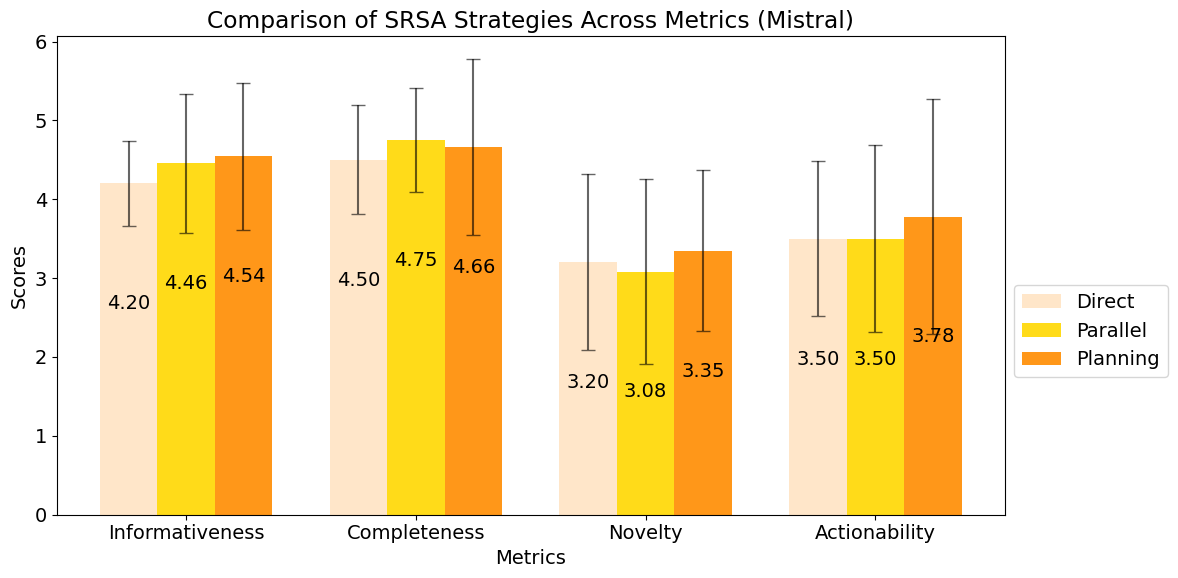

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
metrics = ['Informativeness', 'Completeness', 'Novelty', 'Actionability']
model_types = ['Direct', 'Parallel', 'Planning']

# Means and STDs arranged by metric across model types
means = {
    'Informativeness': [4.200000, 4.458333, 4.542708],
    'Completeness': [4.500000, 4.750000, 4.659375],
    'Novelty': [3.200000, 3.083333, 3.348958],
    'Actionability': [3.500000, 3.500000, 3.781250]
}

stds = {
    'Informativeness': [0.273861, 0.450168, 0.477388],
    'Completeness': [0.353553, 0.337100, 0.570148],
    'Novelty': [0.570088, 0.596708, 0.519298],
    'Actionability': [0.500000, 0.603023, 0.760022]
}

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))

# Colors for clarity
colors = ['bisque', 'gold', 'darkorange',]

# Plotting each model type's metrics and storing the result for labeling
rects_list = []
for i, model_type in enumerate(model_types):
    means_list = [means[metric][i] for metric in metrics]
    stds_list = [stds[metric][i] for metric in metrics]
    
    rects = ax.bar(x + i * width, means_list, width, label=model_type, yerr=np.array(stds_list)*confidence_interval_95, 
                   capsize=5, color=colors[i], alpha=0.9, error_kw=dict(alpha=0.6))
    rects_list.append(rects)

# Adding labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of SRSA Strategies Across Metrics (Mistral)')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend( bbox_to_anchor=(1, 0.5))


# Function to add labels to bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2 , height-1.7),
                
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to all bars
for rects in rects_list:
    add_labels(rects)

plt.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.show()


----

## T-test

In [104]:
data_s

,model_type,model_name,test_id,informativeness,completeness,novelty,actionability,strategy
0,ReAct,gemma,0,4.5,4.5,3.0,4.5,NaN
2,ReAct,gemma,1,2.5,2.0,1.5,2.5,NaN
4,ReAct,gemma,2,3.5,4.0,3.0,3.5,NaN
6,ReAct,gemma,3,4.0,4.0,2.5,3.5,NaN
8,ReAct,gemma,4,4.0,3.0,2.5,2.5,NaN
...,...,...,...,...,...,...,...,...
3341,Simple,mistral,177,4.0,4.5,3.5,3.5,NaN
3343,Simple,mistral,178,4.0,4.0,3.0,2.0,NaN
3344,Simple,mistral,179,5.0,5.0,4.5,4.0,NaN
3346,Simple,mistral,180,3.0,3.5,2.0,3.0,NaN


mistral

In [105]:
import pandas as pd
from scipy import stats

# Assuming 'data_s' is your dataframe
# Step 1: Filter the data for 'mistral' model_name
mistral_data = data_s[data_s['model_name'] == 'mistral']

# Step 2: Separate metrics by model type
srsa = mistral_data[mistral_data['model_type'] == 'SRSA']
react = mistral_data[mistral_data['model_type'] == 'ReAct']
simple = mistral_data[mistral_data['model_type'] == 'Simple']

# Step 3: Define the metrics to test
metrics = ['informativeness', 'completeness', 'novelty', 'actionability']

# Step 4: Perform T-tests between SRSA and the other models
for metric in metrics:
    # T-test between SRSA and ReAct
    t_stat_react, p_val_react = stats.ttest_ind(srsa[metric], react[metric], equal_var=False)
    
    # T-test between SRSA and Simple
    t_stat_simple, p_val_simple = stats.ttest_ind(srsa[metric], simple[metric], equal_var=False)
    
    # Print the results
    print(f"Metric: {metric}")
    print(f"SRSA vs ReAct: t-stat = {t_stat_react:.4f}, p-value = {p_val_react:.9f}")
    print(f"SRSA vs Simple: t-stat = {t_stat_simple:.4f}, p-value = {p_val_simple:.9f}")
    print("-" * 50)
""

Metric: informativeness
SRSA vs ReAct: t-stat = 14.9827, p-value = 0.000000000
SRSA vs Simple: t-stat = 4.8846, p-value = 0.000001590
--------------------------------------------------
Metric: completeness
SRSA vs ReAct: t-stat = 18.5495, p-value = 0.000000000
SRSA vs Simple: t-stat = 7.6341, p-value = 0.000000000
--------------------------------------------------
Metric: novelty
SRSA vs ReAct: t-stat = 10.2449, p-value = 0.000000000
SRSA vs Simple: t-stat = -0.5444, p-value = 0.586532387
--------------------------------------------------
Metric: actionability
SRSA vs ReAct: t-stat = 11.0309, p-value = 0.000000000
SRSA vs Simple: t-stat = 0.0710, p-value = 0.943419301
--------------------------------------------------


''

gemma

In [106]:
import pandas as pd
from scipy import stats

# Assuming 'data_s' is your dataframe
# Step 1: Filter the data for 'mistral' model_name
mistral_data = data_s[data_s['model_name'] == 'gemma']

# Step 2: Separate metrics by model type
srsa = mistral_data[mistral_data['model_type'] == 'SRSA'][mistral_data['strategy'] == 'Direct']
react = mistral_data[mistral_data['model_type'] == 'ReAct']
simple = mistral_data[mistral_data['model_type'] == 'Simple']

# Step 3: Define the metrics to test
metrics = ['informativeness', 'completeness', 'novelty', 'actionability']

# Step 4: Perform T-tests between SRSA and the other models
for metric in metrics:
    # T-test between SRSA and ReAct
    t_stat_react, p_val_react = stats.ttest_ind(srsa[metric], simple[metric], equal_var=False)
    
    # T-test between SRSA and Simple
    # t_stat_simple, p_val_simple = stats.ttest_ind(simple[metric], react[metric], equal_var=False)
    
    # Print the results
    print(f"Metric: {metric}")
    print(f"SRSA vs simple: t-stat = {t_stat_react:.4f}, p-value = {p_val_react:.4f}")
    print("-" * 50)
""

Metric: informativeness
SRSA vs simple: t-stat = 4.2606, p-value = 0.0000
--------------------------------------------------
Metric: completeness
SRSA vs simple: t-stat = 5.9207, p-value = 0.0000
--------------------------------------------------
Metric: novelty
SRSA vs simple: t-stat = 1.5989, p-value = 0.1109
--------------------------------------------------
Metric: actionability
SRSA vs simple: t-stat = 1.4099, p-value = 0.1598
--------------------------------------------------


/var/folders/q3/w058rs213y1fbnz4r36x5z2m0000gn/T/ipykernel_51538/738509421.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  srsa = mistral_data[mistral_data['model_type'] == 'SRSA'][mistral_data['strategy'] == 'Direct']


''

llama

In [107]:
import pandas as pd
from scipy import stats

# Assuming 'data_s' is your dataframe
# Step 1: Filter the data for 'mistral' model_name
mistral_data = data_s[data_s['model_name'] == 'llama']

# Step 2: Separate metrics by model type
srsa = mistral_data[mistral_data['model_type'] == 'SRSA'][mistral_data['strategy'] == 'Direct']
react = mistral_data[mistral_data['model_type'] == 'ReAct']
simple = mistral_data[mistral_data['model_type'] == 'Simple']

# Step 3: Define the metrics to test
metrics = ['informativeness', 'completeness', 'novelty', 'actionability']

# Step 4: Perform T-tests between SRSA and the other models
for metric in metrics:
    # T-test between SRSA and ReAct
    t_stat_react, p_val_react = stats.ttest_ind(srsa[metric], simple[metric], equal_var=False)
    
    # # T-test between SRSA and Simple
    # t_stat_simple, p_val_simple = stats.ttest_ind(simple[metric], react[metric], equal_var=False)
    
    # Print the results
    print(f"Metric: {metric}")
    print(f"SRSA vs Simple: t-stat = {t_stat_react:.4f}, p-value = {p_val_react:.4f}")

    print("-" * 50)
""

Metric: informativeness
SRSA vs Simple: t-stat = 3.6302, p-value = 0.0003
--------------------------------------------------
Metric: completeness
SRSA vs Simple: t-stat = 6.3128, p-value = 0.0000
--------------------------------------------------
Metric: novelty
SRSA vs Simple: t-stat = -0.7108, p-value = 0.4777
--------------------------------------------------
Metric: actionability
SRSA vs Simple: t-stat = -1.5057, p-value = 0.1333
--------------------------------------------------


/var/folders/q3/w058rs213y1fbnz4r36x5z2m0000gn/T/ipykernel_51538/2967936670.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  srsa = mistral_data[mistral_data['model_type'] == 'SRSA'][mistral_data['strategy'] == 'Direct']


''